# ANN for make simulation and make prediction in physics

# import working liberary

In [151]:
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization
from keras.optimizers import RMSprop
from keras.models import load_model
import numpy as np

# global variables

In [152]:
# input variable to program
#inputFile = 'datasets/collect data_pi-modified.xlsx'
inputFile = 'All data mesons+baryons.xlsx'
inputSheetName = 'main'
outputFile = 'out_in4.xlsx'
outputSheetName = 'predicat_in4'
nameFigImg = 'fig_in4.png'


# read data

In [153]:
""" from openpyxl import Workbook
import openpyxl """
# Read the data from the excel file
data = pd.read_excel(inputFile,sheet_name=inputSheetName)
#data = data[data['N part']==337]
# Split the data into input and output variables
#X = data.drop('sqrt', axis=1) #static input for each case : extra dat2 of fiting
err1=data['err1'].to_frame('err1')
err2=data['err2'].to_frame('err2')
#X = data.drop('Spectrum', axis=1)
#X = X.drop('err1', axis=1)
#X = X.drop('err2', axis=1)
#X = data['Pt']
X = data[['mass','s','N part','Pt']]
y = data['Spectrum'].to_frame('Spectrum')
#y = pd.Series(y)
#y = y.to_frame('Spectrum')
print(X.head)

<bound method NDFrame.head of         mass     s  N part     Pt
0     139.57   7.7     337  0.275
1     139.57   7.7     337  0.325
2     139.57   7.7     337  0.375
3     139.57   7.7     337  0.425
4     139.57   7.7     337  0.475
...      ...   ...     ...    ...
6559  938.27  39.0      14  1.550
6560  938.27  39.0      14  1.650
6561  938.27  39.0      14  1.750
6562  938.27  39.0      14  1.850
6563  938.27  39.0      14  1.950

[6564 rows x 4 columns]>


# normaliz input

In [154]:
# Normalize the input
from sklearn.preprocessing import RobustScaler
# Create a RobustScaler object
scaler = RobustScaler()
# Fit the scaler to the input data and transform it
X_normalized = scaler.fit_transform(X)
# Print the normalized input data
print('X_normalized')
print(X_normalized)
X_train = X_normalized
print('X_train')
print(X_train) 


X_normalized
[[-0.4433542  -0.76774194  1.22162162 -0.59375   ]
 [-0.4433542  -0.76774194  1.22162162 -0.53125   ]
 [-0.4433542  -0.76774194  1.22162162 -0.46875   ]
 ...
 [ 0.5566458   1.2516129  -0.52432432  1.25      ]
 [ 0.5566458   1.2516129  -0.52432432  1.375     ]
 [ 0.5566458   1.2516129  -0.52432432  1.5       ]]
X_train
[[-0.4433542  -0.76774194  1.22162162 -0.59375   ]
 [-0.4433542  -0.76774194  1.22162162 -0.53125   ]
 [-0.4433542  -0.76774194  1.22162162 -0.46875   ]
 ...
 [ 0.5566458   1.2516129  -0.52432432  1.25      ]
 [ 0.5566458   1.2516129  -0.52432432  1.375     ]
 [ 0.5566458   1.2516129  -0.52432432  1.5       ]]


# loada saved model

In [155]:

# Load the saved model
modelName = 'good - all_hadrons_4_test-19-5-2023-8L-100-16.h5'
model = load_model(modelName)
outputFile = 'out_in4- '+modelName+' .xlsx'
outputSheetName = 'predicat_in4-good -  '+modelName+' '
nameFigImg = 'fig_in4-good -  '+modelName+' .png'

# define the model - compile - fit - save

In [156]:
""" 
''' Define the model '''
# Define the model
modelName = 'all-hadron-4in.h5'
model = Sequential(name=modelName)
# Add the first dense layer
model.add(Dense(40, input_dim=4, activation='relu'))

# Add batch normalization
#model.add(BatchNormalization())
model.add(Dense(40, activation='relu'))
#model.add(BatchNormalization())
model.add(Dense(80, activation='relu'))
model.add(Dense(80, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(40, activation='relu'))

# Add the output layer
model.add(Dense(1))
# Add the output layer
#model.add(Dense(1, activation='softmax')) 

''' # compile the model      '''

# Compile the model with Levenberg-Marquardt optimizer
optimizer = RMSprop(learning_rate=0.001, rho=0.001,)
model.compile(loss='mean_squared_error', optimizer=optimizer)

''' train the model & save current compiled model  '''
# Train the model
#model.fit(X, y, epochs=100, batch_size=32, validation_split=0.2)
model.fit(X_train, y, epochs=500, batch_size=16) 
# Save the model
model.save('all_hadrons_4in_test-19-5-2023-8L-500E-16B.h5')


 """

" \n''' Define the model '''\n# Define the model\nmodelName = 'all-hadron-4in.h5'\nmodel = Sequential(name=modelName)\n# Add the first dense layer\nmodel.add(Dense(40, input_dim=4, activation='relu'))\n\n# Add batch normalization\n#model.add(BatchNormalization())\nmodel.add(Dense(40, activation='relu'))\n#model.add(BatchNormalization())\nmodel.add(Dense(80, activation='relu'))\nmodel.add(Dense(80, activation='relu'))\nmodel.add(Dense(40, activation='relu'))\nmodel.add(Dense(40, activation='relu'))\n\n# Add the output layer\nmodel.add(Dense(1))\n# Add the output layer\n#model.add(Dense(1, activation='softmax')) \n\n''' # compile the model      '''\n\n# Compile the model with Levenberg-Marquardt optimizer\noptimizer = RMSprop(learning_rate=0.001, rho=0.001,)\nmodel.compile(loss='mean_squared_error', optimizer=optimizer)\n\n''' train the model & save current compiled model  '''\n# Train the model\n#model.fit(X, y, epochs=100, batch_size=32, validation_split=0.2)\nmodel.fit(X_train, y, epo

# Evaluate the model and make prediction 

In [157]:
from sklearn.metrics import mean_squared_error

# Make predictions on new data
X_test = scaler.transform(X)
print("new_data is : ")
print(X_test)
predictions = model.predict(X_test)
predictions = predictions.flatten()
predictions = pd.Series(predictions)
predictions = predictions.to_frame('predictions')
print("predictions is : ")
print(predictions)

# Evaluate the model
score = model.evaluate(X_test, y)
print("score " , score)
print(score)
mse = mean_squared_error(y,predictions)
print('mse' , mse)

#print("accuracy")
#print(accuracy)

new_data is : 
[[-0.4433542  -0.76774194  1.22162162 -0.59375   ]
 [-0.4433542  -0.76774194  1.22162162 -0.53125   ]
 [-0.4433542  -0.76774194  1.22162162 -0.46875   ]
 ...
 [ 0.5566458   1.2516129  -0.52432432  1.25      ]
 [ 0.5566458   1.2516129  -0.52432432  1.375     ]
 [ 0.5566458   1.2516129  -0.52432432  1.5       ]]
206/206 [==============================] - 0s 598us/step
predictions is : 
      predictions
0      114.209694
1       88.663719
2       65.538467
3       50.508316
4       39.314369
...           ...
6559    -0.017051
6560    -0.002979
6561     0.015945
6562     0.016869
6563     0.006154

[6564 rows x 1 columns]
206/206 [==============================] - 0s 640us/step - loss: 5.1511
score  5.151149749755859
5.151149749755859
mse 5.151149428964741


# draw 

shape of data (6564, 7)
shape of pred (6564, 1)
shape of datap (6564, 8)
shape of xap (6564, 8)
shape of xapf (52, 8)


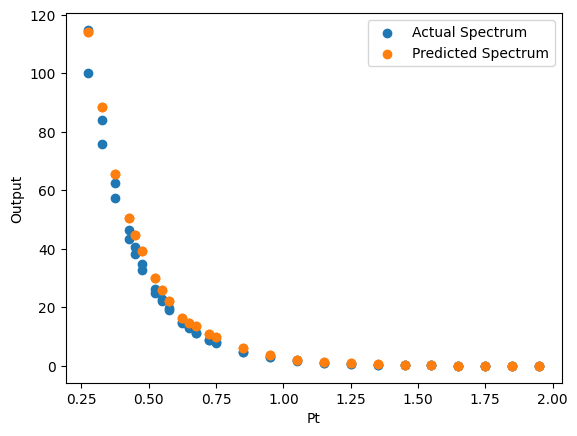

<Figure size 640x480 with 0 Axes>

In [161]:
# for drawing in 2d i choose Pt as x-axis
error = data['Spectrum'] - predictions['predictions']
error = error.to_frame('error')
print('shape of data' , data.shape)
print('shape of pred' , predictions.shape)
datap = pd.concat([data,predictions],axis=1)
print('shape of datap',datap.shape)

# xap : data
xap = pd.DataFrame(datap)
# xapf : xap after filteration
xapf= pd.DataFrame(datap)
xapf = xapf[xapf['s']==7.7]
xapf = xapf[xapf['N part']==337]
xapf = xapf[xapf['mass']==139.57]
print('shape of xap',xap.shape)
print('shape of xapf',xapf.shape)

# Plot the data and predictions

#plt.semilogy(xapf['Pt'], xapf['Spectrum']   ,'bo', label='Actual')
#plt.semilogy(xapf['Pt'], xapf['predictions'],'ro', label='Predicted')
""" plt.scatter(xapf['Pt'], xapf['Spectrum'])
plt.scatter(xapf['Pt'], xapf['predictions'])
plt.xlabel('Pt')
plt.ylabel('Output')
plt.legend(['Ac'])
plt.show()
plt.savefig(nameFigImg) """

plt.scatter(xapf['Pt'], xapf['Spectrum'])
plt.scatter(xapf['Pt'], xapf['predictions'])
plt.xlabel('Pt')
plt.ylabel('Output')
plt.legend(['Actual Spectrum', 'Predicted Spectrum'])
plt.show()
plt.savefig(nameFigImg)

# write output to excel 

In [159]:

# Write predictions , data to Excel file
outputpredicat = pd.DataFrame(datap)
# output is data frame
print(outputpredicat.head(10))
# Write the DataFrames to an Excel file with three sheets
with pd.ExcelWriter(outputFile) as writer:
    outputpredicat.to_excel(writer, sheet_name=outputSheetName, index=False)
    #output.to_excel(writer, sheet_name='output', index=False)


     mass    s  N part     Pt  Spectrum     err1     err2  predictions
0  139.57  7.7     337  0.275  114.8980  0.21538  7.89015   114.209694
1  139.57  7.7     337  0.325   83.9507  0.17051  5.61535    88.663719
2  139.57  7.7     337  0.375   62.4481  0.13799  4.10800    65.538467
3  139.57  7.7     337  0.425   46.3708  0.11247  3.01883    50.508316
4  139.57  7.7     337  0.475   34.7823  0.09267  2.24990    39.314369
5  139.57  7.7     337  0.525   26.3221  0.07704  1.69598    29.894819
6  139.57  7.7     337  0.575   19.7093  0.06396  1.26704    22.027498
7  139.57  7.7     337  0.625   15.0548  0.05379  0.96702    16.321291
8  139.57  7.7     337  0.675   11.2735  0.04492  0.73605    13.490880
9  139.57  7.7     337  0.725    8.7656  0.03832  0.56201    11.047376


d:\Repos\ReposEda\DrSamahPrjs\ANN\ANN\.venv\lib\site-packages\openpyxl\workbook\child.py:99: UserWarning: Title is more than 31 characters. Some applications may not be able to read the file
  warnings.warn("Title is more than 31 characters. Some applications may not be able to read the file")


# print model summery 

In [160]:

print("End")
#print("accuracy :" + str(accuracy))
print("score " + str(score))
print(model.summary())

End
score 5.151149749755859
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_38 (Dense)            (None, 40)                200       
                                                                 
 dense_39 (Dense)            (None, 40)                1640      
                                                                 
 dense_40 (Dense)            (None, 80)                3280      
                                                                 
 dense_41 (Dense)            (None, 80)                6480      
                                                                 
 dense_42 (Dense)            (None, 40)                3240      
                                                                 
 dense_43 (Dense)            (None, 40)                1640      
                                                                 
 dense_44 (Dense)         